In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

This notebook selects the dimension and preprocess all the data into trainable values. 

## 1. Loading dataset

In [52]:
dataset_df = pd.read_csv('data/filtered_nrel.csv', delimiter='\t')
print('Dataset shape: ', dataset_df.shape)

Dataset shape:  (35665, 28)


/tmp/ipykernel_5761/4269587800.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_df = pd.read_csv('data/filtered_nrel.csv', delimiter='\t')


The dataset contains 67622 rows and 28 columns. The top 5 rows are shown below.

## 2. Exploratory Data Analysis

In [53]:
dataset_df.drop([
    'Status Code', 'Expected Date', 'EV Other Info', 'EV Network Web',
    'Groups With Access Code', 'Access Detail Code'], axis=1, inplace=True)

In [54]:
dataset_df.head()

,Station Name,Street Address,Access Days Time,Cards Accepted,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Network,Latitude,Longitude,...,Open Date,EV Connector Types,Access Code,Facility Type,EV Pricing,EV On-Site Renewable Source,Restricted Access,NPS Unit Name,Maximum Vehicle Class,EV Workplace Charging
0,"Walmart 2508 - Boise, ID",8300 W. Overland Rd,24 hours daily,NaN,NaN,NaN,4.0,Electrify America,43.59142,-116.28359,...,2019-04-26,CHADEMO J1772COMBO,public,NaN,NaN,NaN,NaN,NaN,NaN,False
1,"Walmart 2508 - Boise, ID",8300 W. Overland Rd,24 hours daily,NaN,NaN,NaN,4.0,Electrify America,43.59142,-116.28359,...,2019-04-26,CHADEMO J1772COMBO,public,NaN,NaN,NaN,NaN,NaN,NaN,False
2,"Walmart 2508 - Boise, ID",8300 W. Overland Rd,24 hours daily,NaN,NaN,NaN,4.0,Electrify America,43.59142,-116.28359,...,2019-04-26,CHADEMO J1772COMBO,public,NaN,NaN,NaN,NaN,NaN,NaN,False
3,"Walmart 2508 - Boise, ID",8300 W. Overland Rd,24 hours daily,NaN,NaN,NaN,4.0,Electrify America,43.59142,-116.28359,...,2019-04-26,CHADEMO J1772COMBO,public,NaN,NaN,NaN,NaN,NaN,NaN,False
4,"Walmart 2508 - Boise, ID",8300 W. Overland Rd,24 hours daily,NaN,NaN,NaN,4.0,Electrify America,43.59142,-116.28359,...,2019-04-26,CHADEMO J1772COMBO,public,NaN,NaN,NaN,NaN,NaN,NaN,False


In [55]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35665 entries, 0 to 35664
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Station Name                 35665 non-null  object 
 1   Street Address               35665 non-null  object 
 2   Access Days Time             32474 non-null  object 
 3   Cards Accepted               4622 non-null   object 
 4   EV Level1 EVSE Num           54 non-null     float64
 5   EV Level2 EVSE Num           10772 non-null  float64
 6   EV DC Fast Count             27180 non-null  float64
 7   EV Network                   35665 non-null  object 
 8   Latitude                     35665 non-null  float64
 9   Longitude                    35665 non-null  float64
 10  Date Last Confirmed          35648 non-null  object 
 11  Owner Type Code              19239 non-null  object 
 12  Open Date                    35619 non-null  object 
 13  EV Connector Typ

In [56]:
dataset_df.describe()

,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,Latitude,Longitude
count,54.000000,10772.000000,27180.000000,35665.000000,35665.000000
mean,1.111111,2.320646,6.862951,37.813139,-94.055022
std,0.571878,1.800373,4.978790,5.151598,16.817839
min,1.000000,1.000000,1.000000,18.111876,-159.469420
25%,1.000000,1.000000,4.000000,34.173287,-107.876620
50%,1.000000,2.000000,8.000000,38.512443,-88.689490
75%,1.000000,2.000000,8.000000,41.365163,-80.599878
max,4.000000,24.000000,51.000000,61.573564,-65.821744


## 3. Feature Engineering

In [57]:
num_attribs = dataset_df.select_dtypes('number').columns.to_list()
cat_attribs = dataset_df.select_dtypes('object').columns.to_list()

In [58]:
num_attribs

['EV Level1 EVSE Num',
 'EV Level2 EVSE Num',
 'EV DC Fast Count',
 'Latitude',
 'Longitude']

In [59]:
cat_attribs

['Station Name',
 'Street Address',
 'Access Days Time',
 'Cards Accepted',
 'EV Network',
 'Date Last Confirmed',
 'Owner Type Code',
 'Open Date',
 'EV Connector Types',
 'Access Code',
 'Facility Type',
 'EV Pricing',
 'EV On-Site Renewable Source',
 'Restricted Access',
 'NPS Unit Name',
 'Maximum Vehicle Class']

In [60]:
dataset_df['Public_Bool'] = dataset_df['Access Code'].apply(lambda x: 1 if x == 'public' else 0)
dataset_df.drop(['Access Code'], axis=1, inplace=True)

In [61]:
dataset_df['Cards Accepted'].value_counts()

Cards Accepted
A D Debit M V                                         4434
CREDIT                                                  54
A ACCOUNT_BALANCE D M V                                 40
Cash Checks CREDIT                                      19
CREDIT Debit                                            18
A ANDROID_PAY APPLE_PAY CREDIT D M V                    12
A CREDIT D M V                                          10
A CREDIT D Debit M V                                     8
A D M V                                                  7
ANDROID_PAY APPLE_PAY Debit M V                          5
A ANDROID_PAY APPLE_PAY CREDIT Debit M V                 4
A ACCOUNT_BALANCE CREDIT D Debit M V                     3
A Cash D M V                                             2
Checks                                                   2
A CREDIT D Debit M V Voyager Wright_Exp                  2
A ACCOUNT_BALANCE CREDIT D M V                           1
ACCOUNT_BALANCE ANDROID_PAY APPLE_PAY CRE

In [62]:
len(dataset_df['Cards Accepted'].unique())

18

In [63]:
card_list = ['A', 'CREDIT', 'Debit', 'D', 'M', 'V', 'Visa',
             'Cash', 'Checks', 'ACCOUNT_BALANCE', 'ALLIANCE',
             'ANDROID_PAY', 'APPLE_PAY']

In [64]:
for card in card_list:
    dataset_df['Card_' + card] = dataset_df['Cards Accepted'].apply(lambda x: 1 if card in str(x) else 0)
dataset_df.drop('Cards Accepted', axis=1, inplace=True)
    

<Axes: xlabel='EV Level1 EVSE Num', ylabel='Count'>

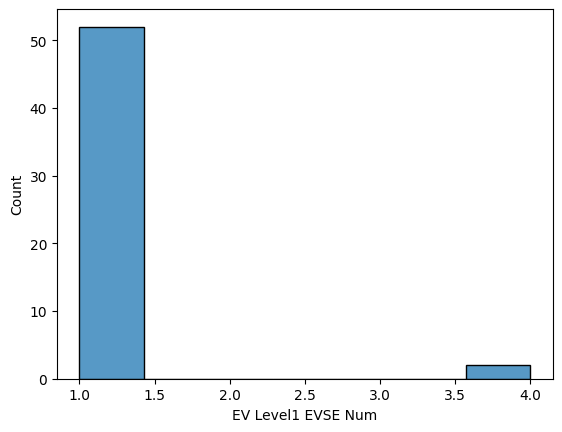

In [65]:
sns.histplot(dataset_df['EV Level1 EVSE Num'])

In [66]:
dataset_df['EV Level1 EVSE Num'].fillna(0, inplace=True)

<Axes: xlabel='EV Level2 EVSE Num', ylabel='Count'>

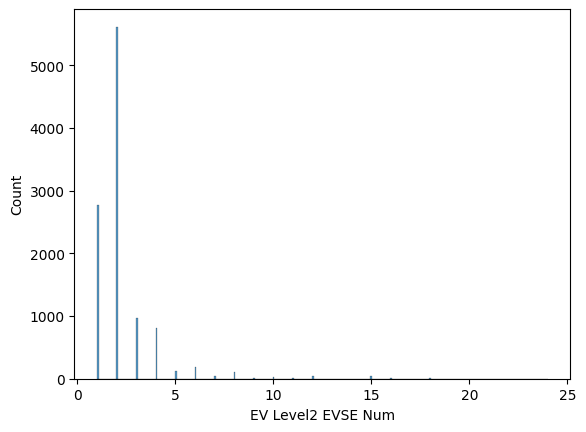

In [67]:
sns.histplot(dataset_df['EV Level2 EVSE Num'])

In [68]:
dataset_df['EV Level2 EVSE Num'].fillna(0, inplace=True)

<Axes: xlabel='EV DC Fast Count', ylabel='Count'>

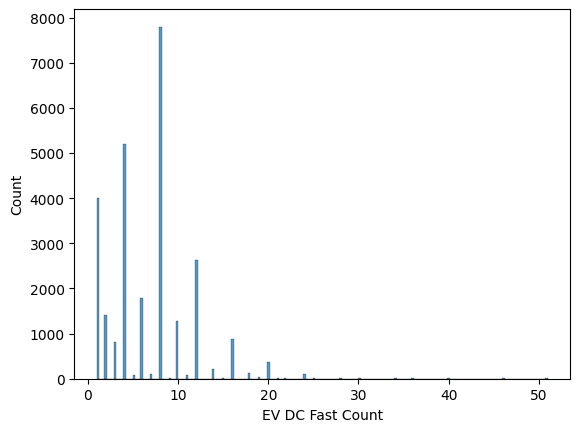

In [69]:
sns.histplot(dataset_df['EV DC Fast Count'])

In [70]:
dataset_df['EV DC Fast Count'].fillna(0, inplace=True)

In [71]:
ev_networks_list = dataset_df['EV Network'].value_counts().index.to_list()[:15]
ev_networks_list = ['ChargePoint Network',
                    'Non-Networked',
                    'Blink Network',
                    'Tesla',
                    'Volta',
                    'EV Connect',
                    'SHELL_RECHARGE',
                    'eVgo Network',
                    'Electrify America',
                    'AMPUP',
                    'FLO',
                    'RIVIAN',
                    'LIVINGSTON']

In [72]:
for network in ev_networks_list:
    dataset_df['Network_' + network] = dataset_df['EV Network'].apply(lambda x: 1 if network in str(x) else 0)
dataset_df.drop('EV Network', axis=1, inplace=True)
    

In [73]:
dataset_df['EV Pricing'].value_counts()[:20]

EV Pricing
Free                                                                                                         3988
FREE                                                                                                          102
$1.00/Hr Parking Fee                                                                                           46
Level 2: $4 per session or $19.99 for monthly plan, DC Fast: $7.50 per session or $19.99 for monthly plan      34
$2.00/Hr Parking Fee                                                                                           30
$0.15 per kWh                                                                                                  29
DC Fast: $7.50 per session or $19.99 for monthly plan, Level 2: $4 per session or $19.99 for monthly plan      24
Suggested donation of $3 per hour                                                                              21
$0.39 per kWh                                                                

In [74]:
def get_electric_price(x):
    x = str(x)
    if x.lower() == 'free':
        return 0
    # Extract hourly rate
    rate = re.findall(r'(\$\d+\.?\d*)-(\$\d+\.?\d*)/kWh \w+ Energy Fee', x)
    if not rate:
        rate = re.findall(r'(\$\d+\.?\d*)/kWh Energy Fee', x)
    if not rate:
        rate = re.findall(r'(\$\d+\.?\d*) per kWh', x)
    # Convert to float if rate is found else return None
    rate = re.findall(r'\d+\.?\d*', str(rate))
    for i in range(len(rate)):
        rate[i] = float(rate[i])
    if rate:
        return np.mean(rate)
    else:
        return -1

In [75]:
def get_park_price(x):
    x = str(x)
    if str(x).lower() == 'free':
        return 0
    # Extract hourly rate
    hourly_rate = re.findall(r'(\$\d+\.?\d*)-(\$\d+\.?\d*)/Hr \w+ Parking Fee', x)
    if not hourly_rate:
        hourly_rate = re.findall(r'(\$\d+\.?\d*)/Hr Parking Fee', x)
    # Convert to float if hourly_rate is found else return None
    hourly_rate = re.findall(r'\d+\.?\d*', str(hourly_rate))
    for i in range(len(hourly_rate)):
        hourly_rate[i] = float(hourly_rate[i])
    if hourly_rate:
        return np.mean(hourly_rate)
    else:
        return -1
                                                                 

In [76]:
dataset_df['park_price'] = dataset_df['EV Pricing'].apply(get_park_price)
dataset_df['electric_price'] = dataset_df['EV Pricing'].apply(get_electric_price)
dataset_df.drop('EV Pricing', axis=1, inplace=True)

In [77]:
dataset_df.drop(['Station Name', 'Street Address', 'Access Days Time', 
                 'Date Last Confirmed', 'Open Date', 'NPS Unit Name'], axis=1, inplace=True)

In [78]:
dataset_dummies = pd.get_dummies(dataset_df['Owner Type Code'], prefix='Owner_Type')
dataset_df = pd.concat([dataset_df, dataset_dummies], axis=1)
dataset_df.drop('Owner Type Code', axis=1, inplace=True)

In [79]:
dataset_df['EV Connector Types'].value_counts().head()

EV Connector Types
TESLA                       15684
CHADEMO J1772COMBO           9849
J1772                        5573
CHADEMO J1772 J1772COMBO     2009
J1772 TESLA                  1727
Name: count, dtype: int64

In [80]:
connector_list = ['NEMA1450', 'NEMA515', 'NEMA520', 
                  'J1772', 'J1772COMBO', 'CHADEMO', 'TESLA']
for connector in connector_list:
    dataset_df['Connector_' + connector] = dataset_df['EV Connector Types'].apply(lambda x: 1 if connector in str(x) else 0)
dataset_df.drop('EV Connector Types', axis=1, inplace=True)

In [81]:
dataset_df['EV On-Site Renewable Source'].value_counts()

EV On-Site Renewable Source
SOLAR    57
HYDRO    12
NONE      2
Name: count, dtype: int64

In [82]:
dataset_dummies = pd.get_dummies(dataset_df['EV On-Site Renewable Source'], prefix='Renewable_Source')
dataset_df = pd.concat([dataset_df, dataset_dummies], axis=1)
dataset_df.drop('EV On-Site Renewable Source', axis=1, inplace=True)

In [83]:
dataset_df['Maximum Vehicle Class'].value_counts()

Maximum Vehicle Class
LD    5697
MD      54
HD      14
Name: count, dtype: int64

In [84]:
def map(x):
    if x == 'LD':
        return 1
    elif x == 'MD':
        return 2
    elif x == 'HD':
        return 3
    else:
        return 0

dataset_df['Maximum_Vehicle_Class_Num'] = dataset_df['Maximum Vehicle Class'].apply(map)
dataset_df.drop('Maximum Vehicle Class', axis=1, inplace=True)

In [85]:
facilities = dataset_df['Facility Type'].value_counts()[:10].index.to_list()
facilities

['SHOPPING_CENTER',
 'HOTEL',
 'GAS_STATION',
 'GROCERY',
 'CONVENIENCE_STORE',
 'RESTAURANT',
 'PARKING_LOT',
 'CAR_DEALER',
 'SHOPPING_MALL',
 'TRAVEL_CENTER']

In [86]:
for facility in facilities:
    dataset_df['Facility_' + facility] = dataset_df['Facility Type'].apply(lambda x: 1 if facility in str(x) else 0)

In [87]:
dataset_df.drop('Facility Type', axis=1, inplace=True)

In [88]:
dataset_df['Restricted Access'] = dataset_df['Restricted Access'].apply(lambda x: 1 if x == 'True' else 0)

In [89]:
dataset_df['EV Workplace Charging'] = dataset_df['EV Workplace Charging'].apply(lambda x: 1 if x == 'True' else 0)

In [90]:
dataset_df.to_csv('data/processed_nrel.csv', index=False)